# GBSV Mini-Challenge 1 Notebook 2

## Day 4

### Daten
Für die Analyse benötige ich Daten, welche ein wiederkehrendes Muster aufweisen. In den letzten Tagen habe ich mich mit den Wasserstandsdaten des St.-Lawrence Stroms in Montreal beschäftigt. Diese Daten sind stündlich über mehrere Jahre verfügbar und weisen ein Muster auf, welches Jährlich wiederkehrt.

### Autokorrelation über alle Jahre

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Einlesen der CSV-Datei
water_raw = pd.read_csv(
    "data/st_lawrence_water.csv",
    skiprows=8, 
    usecols=[0, 1],                # nur die ersten beiden Spalten laden
    names=["Observed_date", "Sealevel"],    # Spaltennamen setzen
    parse_dates=["Observed_date"],      # Datum parsen
    encoding="latin1"
)

print(water_raw.head())

        Observed_date  Sealevel
0 2015-01-01 00:00:00      0.32
1 2015-01-01 01:00:00      0.32
2 2015-01-01 02:00:00      0.33
3 2015-01-01 03:00:00      0.33
4 2015-01-01 04:00:00      0.33


(-0.29, 3.29)

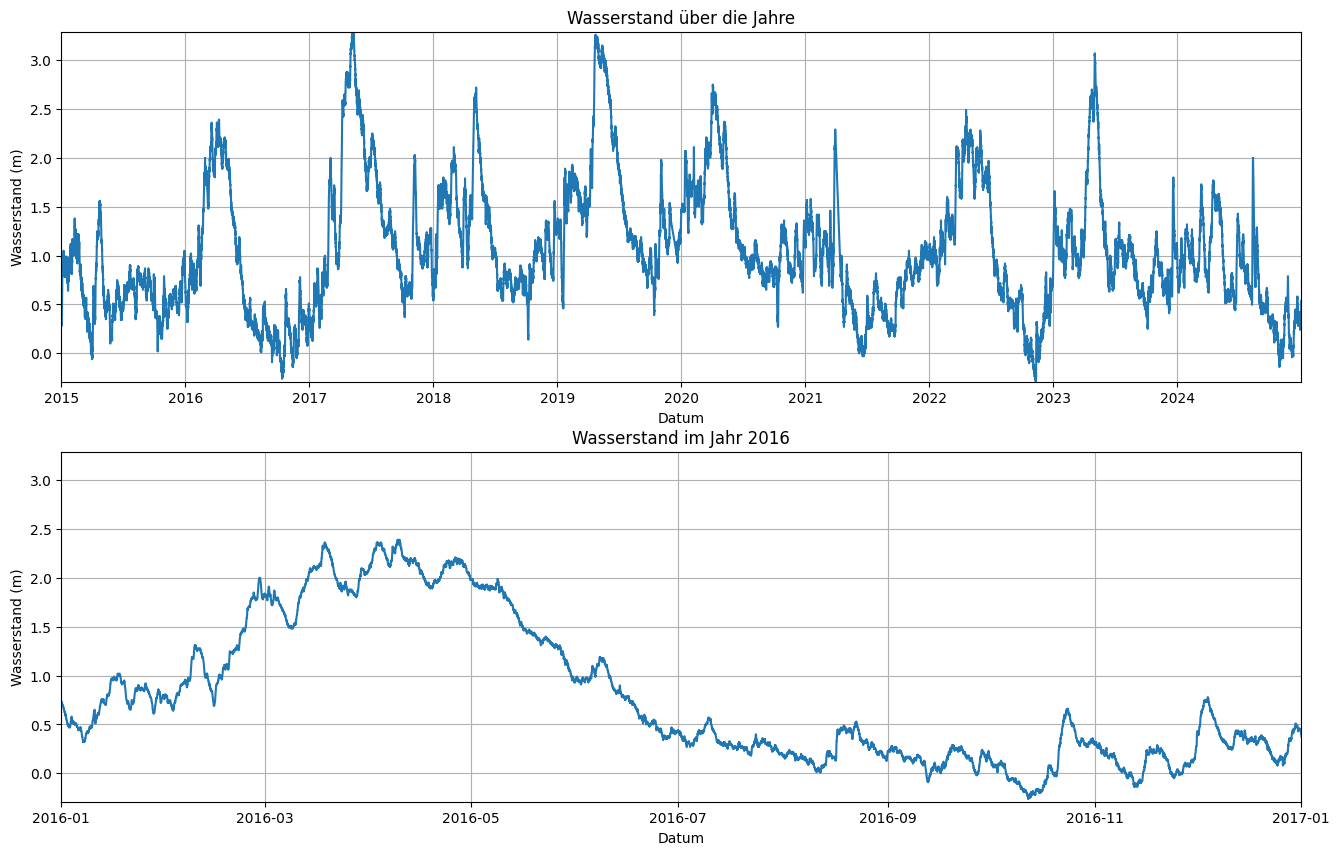

In [36]:
# Plotten der Daten einmal über die ganzen Jahre und für ein Jahr
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(water_raw["Observed_date"], water_raw["Sealevel"])
plt.title("Wasserstand über die Jahre")
plt.xlabel("Datum")
plt.ylabel("Wasserstand (m)")
plt.grid()
plt.xlim([water_raw["Observed_date"].min(), water_raw["Observed_date"].max()])
plt.ylim([water_raw["Sealevel"].min(), water_raw["Sealevel"].max()])
plt.subplot(2, 1, 2)
plt.plot(water_raw["Observed_date"], water_raw["Sealevel"])
plt.title("Wasserstand im Jahr 2016")
plt.xlabel("Datum")
plt.ylabel("Wasserstand (m)")
plt.grid()
plt.xlim([pd.Timestamp("2016-01-01"), pd.Timestamp("2017-01-01")])
plt.ylim([water_raw["Sealevel"].min(), water_raw["Sealevel"].max()])

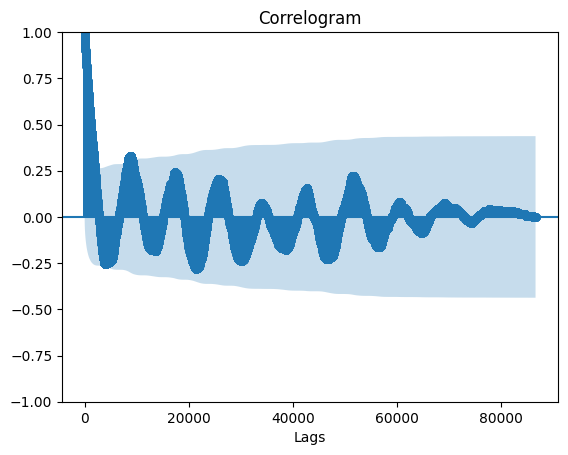

In [37]:
# Anzahl der Lags
lags = len(water_raw["Sealevel"])-1

# Berechnung und Plot der Autokorrelationsfunktion
sm.graphics.tsa.plot_acf(water_raw["Sealevel"], lags=lags, title="Correlogram")
plt.xlabel("Lags")
plt.show()

Um das ganze etwas klarer zu machen und auch mehr die saisonalität zu sehen, habe ich die Daten auf monatliche Intervalle gemittelt.

In [38]:
water_monthly = water_raw.resample('ME', on='Observed_date').mean()

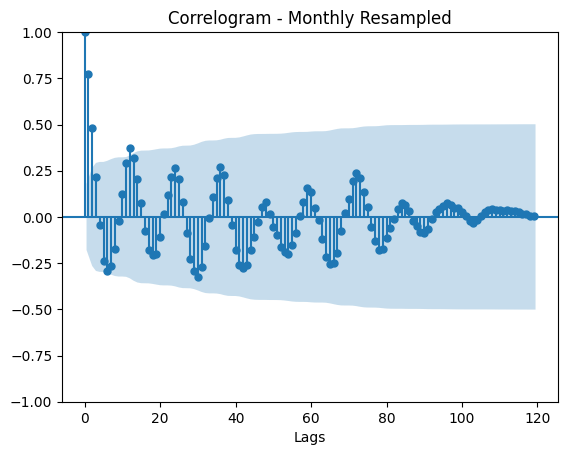

In [39]:
# Autokorrelationsfunktion für monatliche Daten
lags = len(water_monthly)-1
sm.graphics.tsa.plot_acf(water_monthly["Sealevel"], lags=lags, title="Correlogram - Monthly Resampled")
plt.xlabel("Lags")
plt.show()

Im Auto-Korrelationsdiagramm sieht man nun, dass nach ca. 12 Monaten die Korrelation wieder sehr hoch ist, was auf eine jährliche Saisonalität hinweist. Um das Ganze noch etwas einfacher darzustellen, kann mach auch die Daten in 4 Quartale pro Jahr aufteilen. Dies schwächt natürlich die Genauigkeit etwas ab, macht das Muster aber noch klarer ersichtlich.

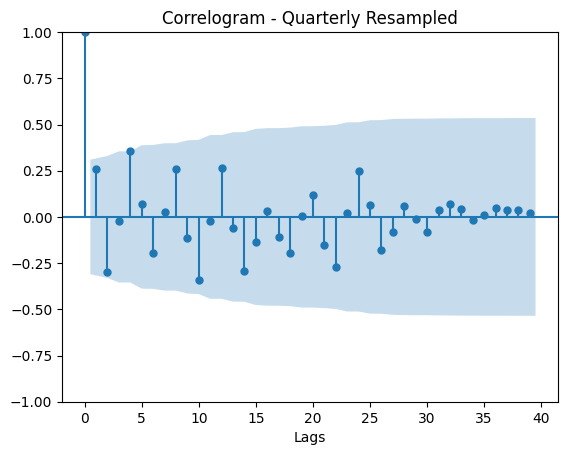

In [40]:
water_quarterly = water_raw.resample('QE', on='Observed_date').mean()

# Autokorrelationsfunktion für monatliche Daten
lags = len(water_quarterly)-1
sm.graphics.tsa.plot_acf(water_quarterly["Sealevel"], lags=lags, title="Correlogram - Quarterly Resampled")
plt.xlabel("Lags")
plt.show()

Hier sieht man noch genauer, jedes Vierte Quartal weisst wieder eine höhere Korrelation auf. Nach 4 Jahren ist die Korrelation in allen Plots nahe bei 0. Wenn die jeweils 4 Aufeinanderfolgende Jahre betrachtet werden, sieht man, dass diese oft unterschiedlich zu anderen 4 Jahreszeiträumen sind. Wahrscheinlich hebt sich dieser Effekt im Anschluss bei 5 und 6 Jährigen Zeiträumen wieder etwas auf.

## Day 5
### Problemstellung

Die wiederholenden Muster in den Daten sind wichtig zu verstehen. Es ist enorm wichtig, diese Muster zu erkennen, um Vorhersagen über zukünftige Ereignisse treffen zu können. In diesem Fall muss bei der Planung von Bauprojekten wie Brücken oder Hafenanlagen der Wasserstand berücksichtigt werden. Und dies sollte für alle Jahreszeiten und nicht nur für den Durchschnittswasserstand über das Jahr hinweg geschehen. Ansonsten könnten die Brücken im Frühling/Sommer zu niedrig sein oder die Hafenanlagen im Herbst/Winter zu hoch. Zudem ist wichtig zu erkennen, dass die Wasserstände von Jahr zu Jahr über mehrere Jahre hinweg zwar ähnlich sind, aber nicht Identisch. Beispielsweise ist bei Vier Jahren in folge fast keine Autokorrelation mehr vorhanden. Es muss also beim Bau auch darauf geachtet werden, dass die Wasserstände von Jahr zu Jahr etwas variieren können.